In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
%reload_ext autoreload
%autoreload 2 
%matplotlib inline


In [2]:
from fastai.vision import *
from fastai.metrics import error_rate,acc
import os

In [3]:
bs = 64


In [4]:
path = Path('../input/chest-xray-pneumonia/chest_xray/chest_xray')
path.ls()

[PosixPath('../input/chest-xray-pneumonia/chest_xray/chest_xray/test'),
 PosixPath('../input/chest-xray-pneumonia/chest_xray/chest_xray/train'),
 PosixPath('../input/chest-xray-pneumonia/chest_xray/chest_xray/val'),
 PosixPath('../input/chest-xray-pneumonia/chest_xray/chest_xray/.DS_Store')]

torch.Size([3, 1225, 1632])


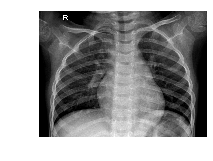

In [5]:
img = open_image(path/'val'/'NORMAL'/'NORMAL2-IM-1440-0001.jpeg')
print(img.data.shape)
img.show()

In [6]:
tfms = get_transforms()

In [7]:
np.random.seed(7)
data = ImageDataBunch.from_folder(path,valid = 'val',valid_pct=0.2,size=256,bs =bs,ds_tfms=tfms).normalize(imagenet_stats)

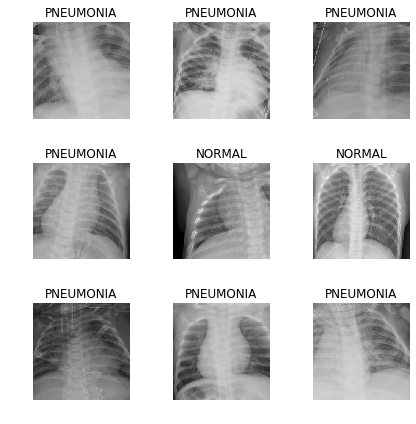

In [8]:
data.show_batch(3,figsize=(6,6))

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /tmp/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 52.6MB/s]


In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.447858,0.292425,0.087105,04:08
1,0.269993,0.203336,0.070026,04:02
2,0.196025,0.153321,0.054654,04:01
3,0.158276,0.182916,0.062340,04:00


In [11]:
learn.save('stage-1')

In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


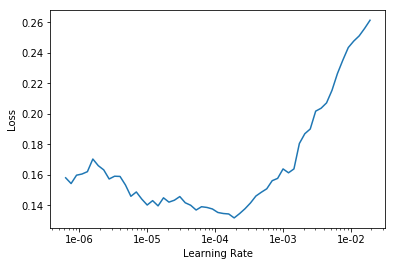

In [14]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(10, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.133714,0.136731,0.046968,04:04
1,0.138561,0.150150,0.055508,04:04
2,0.125451,0.104622,0.040991,04:03
3,0.108113,0.129462,0.036721,04:04
4,0.086326,0.085619,0.031597,04:05
5,0.081246,0.127372,0.034159,04:06
6,0.065000,0.104169,0.028181,04:07
7,0.056738,0.108809,0.029889,04:05
8,0.045821,0.095747,0.027327,04:04
9,0.047153,0.101596,0.029035,04:07


In [17]:
learn.save('stage-2')

In [18]:
learn.validate(learn.data.test_dl)

[0.10159569, tensor(0.0290)]

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

In [20]:
losses,idxs = interp.top_losses()

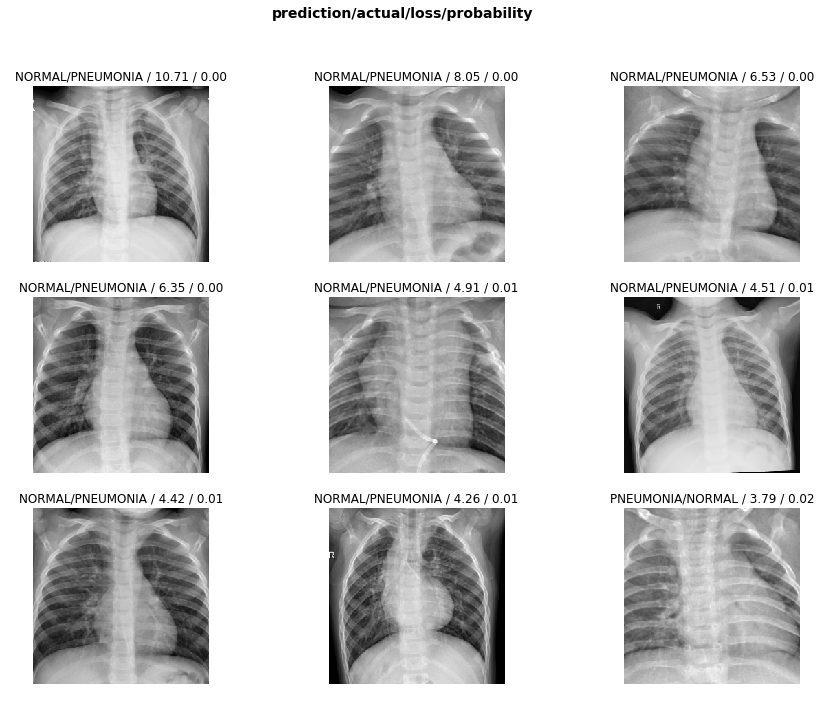

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

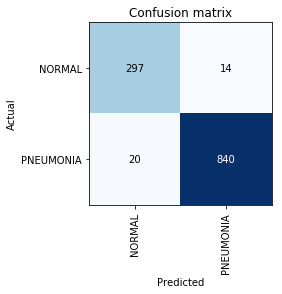

In [22]:
interp.plot_confusion_matrix()

In [23]:
interp.most_confused(min_val=2)

[('PNEUMONIA', 'NORMAL', 20), ('NORMAL', 'PNEUMONIA', 14)]